<a href="https://colab.research.google.com/github/dfukagaw28/ColabNotebooks/blob/main/mmpose%E3%82%92%E8%A9%A6%E3%81%99_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mmpose を試す (2)

*   3D の姿勢推定を試す
*   参考
    *   https://github.com/open-mmlab/mmpose/blob/main/demo/docs/en/3d_human_pose_demo.md

## 準備

In [1]:
# このセルを実行後，再起動が必要
!pip install openmim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 623.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.6/449.6 kB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.5/311.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.5/506.5 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 5.4 MB/s eta 0

In [1]:
!pip install -U albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.16
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [2]:
!mim install mmdet mmcv mmpose

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.4.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.6 MB/s eta 0:00:00
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.7 MB/s eta 0:00:00
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmdet: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.3/452.3 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### ソースコードを書き換える

In [3]:
%%writefile mmdet__init__.diff
--- a/__init__.py	2023-10-12 07:06:32.000000000 +0000
+++ b/__init__.py	2024-10-16 00:00:00.000000000 +0000
@@ -6,7 +6,7 @@ from mmengine.utils import digit_version
 from .version import __version__, version_info

 mmcv_minimum_version = '2.0.0rc4'
-mmcv_maximum_version = '2.2.0'
+mmcv_maximum_version = '2.3.0'
 mmcv_version = digit_version(mmcv.__version__)

 mmengine_minimum_version = '0.7.1'

Writing mmdet__init__.diff


In [4]:
!cd /usr/local/lib/python3.10/dist-packages/mmdet && patch -p1 < /content/mmdet__init__.diff

patching file __init__.py


## デモ用の動画をダウンロードする

In [5]:
!wget -P demo https://user-images.githubusercontent.com/87690686/164970135-b14e424c-765a-4180-9bc8-fa8d6abc5510.mp4

--2024-10-15 22:57:00--  https://user-images.githubusercontent.com/87690686/164970135-b14e424c-765a-4180-9bc8-fa8d6abc5510.mp4
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2633365 (2.5M) [video/mp4]
Saving to: ‘demo/164970135-b14e424c-765a-4180-9bc8-fa8d6abc5510.mp4’

164970135-b14e424c- 100%[===================>]   2.51M  --.-KB/s    in 0.05s   

2024-10-15 22:57:01 (48.2 MB/s) - ‘demo/164970135-b14e424c-765a-4180-9bc8-fa8d6abc5510.mp4’ saved [2633365/2633365]



## モデルをダウンロードする

In [10]:
!git clone --depth 1 https://github.com/open-mmlab/mmpose.git

Cloning into 'mmpose'...
remote: Enumerating objects: 2357, done.
remote: Counting objects: 100% (2357/2357), done.
remote: Compressing objects: 100% (1542/1542), done.
remote: Total 2357 (delta 1012), reused 1600 (delta 752), pack-reused 0 (from 0)
Receiving objects: 100% (2357/2357), 16.05 MiB | 22.07 MiB/s, done.
Resolving deltas: 100% (1012/1012), done.


## まず single frame inference を用いた 2D pose detection を試す

In [13]:
det_config = 'mmpose/demo/mmdetection_cfg/rtmdet_m_640-8xb32_coco-person.py'
det_checkpoint = 'https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth'
pose_estimator_config = 'mmpose/configs/body_2d_keypoint/rtmpose/body8/rtmpose-m_8xb256-420e_body8-256x192.py'
pose_estimator_checkpoint = 'https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth'
pose_lifter_config = 'mmpose/configs/body_3d_keypoint/video_pose_lift/h36m/video-pose-lift_tcn-243frm-supv-cpn-ft_8xb128-200e_h36m.py'
pose_lifter_checkpoint = 'https://download.openmmlab.com/mmpose/body3d/videopose/videopose_h36m_243frames_fullconv_supervised_cpn_ft-88f5abbb_20210527.pth'
input = 'demo/164970135-b14e424c-765a-4180-9bc8-fa8d6abc5510.mp4'
output_root = 'vis_results'

!python mmpose/demo/body3d_pose_lifter_demo.py {det_config} {det_checkpoint} {pose_estimator_config} {pose_estimator_checkpoint} {pose_lifter_config} {pose_lifter_checkpoint} --input {input} --output-root {output_root} --save-predictions

/usr/local/lib/python3.10/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
Downloading: "https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth" to /root/.cache/torch/hub/checkpoints/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
100% 94.4M/94.4M [00:04<00:00, 22.8MB/s]
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
Downloading: "https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420

## 次に multi-frame inference を用いた 2D pose detection を試す

In [25]:
det_config = 'mmpose/demo/mmdetection_cfg/rtmdet_m_640-8xb32_coco-person.py'
det_checkpoint = 'https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth'
pose_estimator_config = 'mmpose/configs/body_2d_keypoint/rtmpose/body8/rtmpose-m_8xb256-420e_body8-256x192.py'
pose_estimator_checkpoint = 'https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth'
pose_lifter_config = 'mmpose/configs/body_3d_keypoint/video_pose_lift/h36m/video-pose-lift_tcn-243frm-supv-cpn-ft_8xb128-200e_h36m.py'
pose_lifter_checkpoint = 'https://download.openmmlab.com/mmpose/body3d/videopose/videopose_h36m_243frames_fullconv_supervised_cpn_ft-88f5abbb_20210527.pth'
input = 'demo/164970135-b14e424c-765a-4180-9bc8-fa8d6abc5510.mp4'
output_root = 'vis_results'

!python mmpose/demo/body3d_pose_lifter_demo.py {det_config} {det_checkpoint} {pose_estimator_config} {pose_estimator_checkpoint} {pose_lifter_config} {pose_lifter_checkpoint} --input {input} --output-root {output_root} --online

/usr/local/lib/python3.10/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmpose/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/body3d/videopose/videopose_h36m_243frames_fullconv_supervised_cpn_ft-88f5abbb_20210527.pth
/usr/local/lib/python3.10/dist-packages/mmpose/datasets/datasets/utils.py:102: UserWarning: The metainfo config file "configs/_base_/datasets/h36m.py" does not exist. A matched config file "/

## いよいよ 3D pose inference を試す

*   https://github.com/open-mmlab/mmpose/blob/main/demo/inferencer_demo.py

In [28]:
inputs = 'mmpose/tests/data/coco/000000000785.jpg'
pose3d = 'human3d'
vis_out_dir = 'vis_results/human3d'

!python mmpose/demo/inferencer_demo.py {inputs} --pose3d {pose3d} --vis-out-dir {vis_out_dir}

/usr/local/lib/python3.10/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/body_3d_keypoint/pose_lift/h36m/motionbert_ft_h36m-d80af323_20230531.pth
Downloading: "https://download.openmmlab.com/mmpose/v1/body_3d_keypoint/pose_lift/h36m/motionbert_ft_h36m-d80af323_20230531.pth" to /root/.cache/torch/hub/checkpoints/motionbert_ft_h36m-d80af323_20230531.pth
100% 162M/162M [00:27<00:00, 6.10MB/s]
10/15 23:36:49 - mmengine - WARNING - Failed to search registry with scope "mmpose" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please che

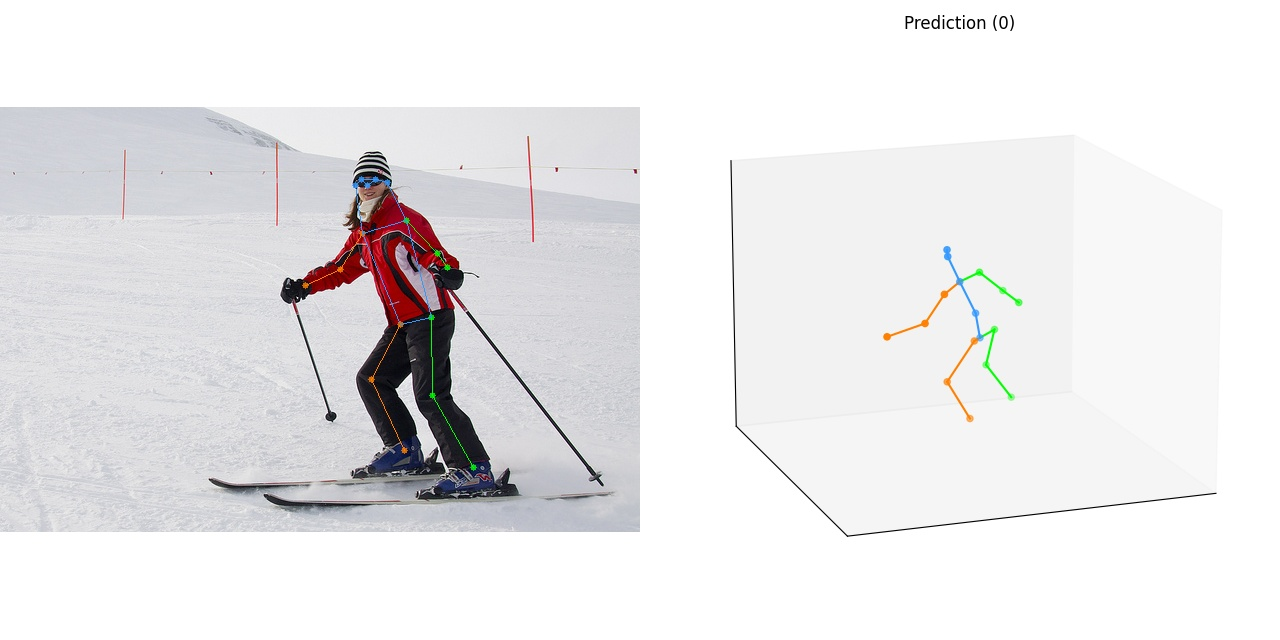

In [29]:
from PIL import Image
Image.open('./vis_results/human3d/000000000785.jpg')

## 複数の画像をまとめて処理する

In [32]:
inputs = 'mmpose/tests/data/coco/'
pose3d = 'human3d'
vis_out_dir = 'vis_results/human3d'

!python mmpose/demo/inferencer_demo.py {inputs} --pose3d {pose3d} --vis-out-dir {vis_out_dir}

/usr/local/lib/python3.10/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/body_3d_keypoint/pose_lift/h36m/motionbert_ft_h36m-d80af323_20230531.pth
10/15 23:42:40 - mmengine - WARNING - Failed to search registry with scope "mmpose" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmpose" is a correct scope, or whether the registry is initialized.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.p

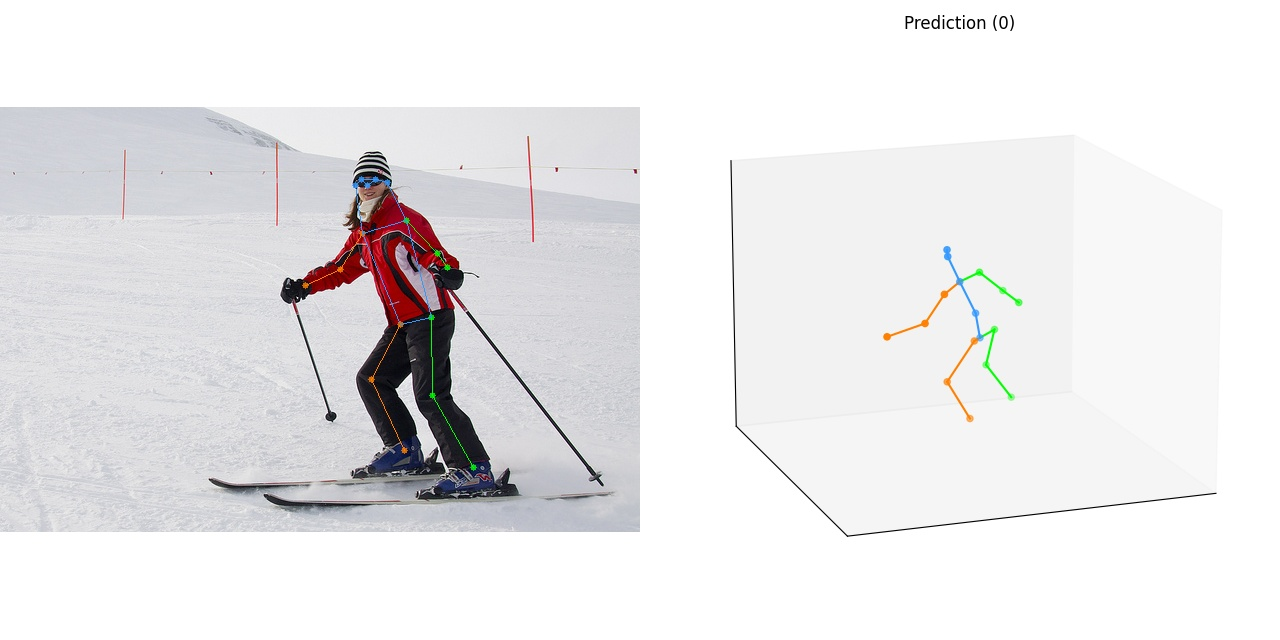

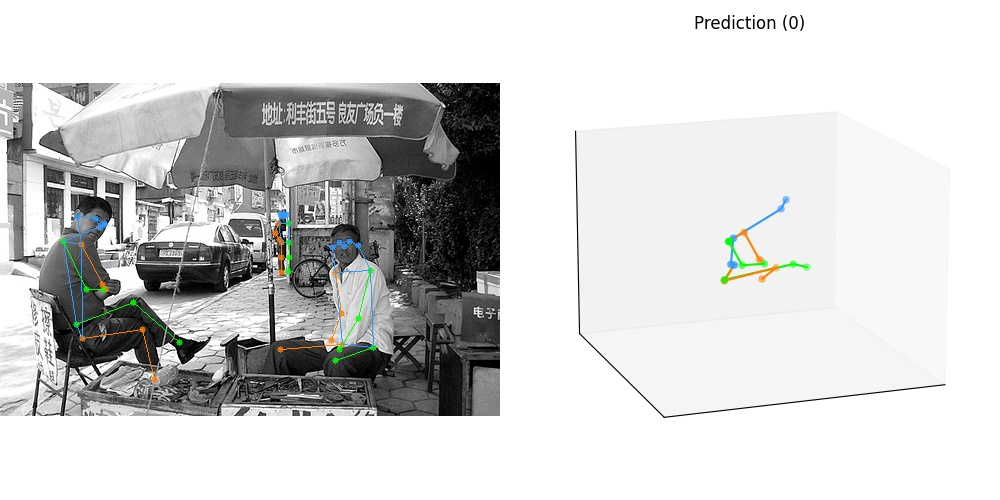

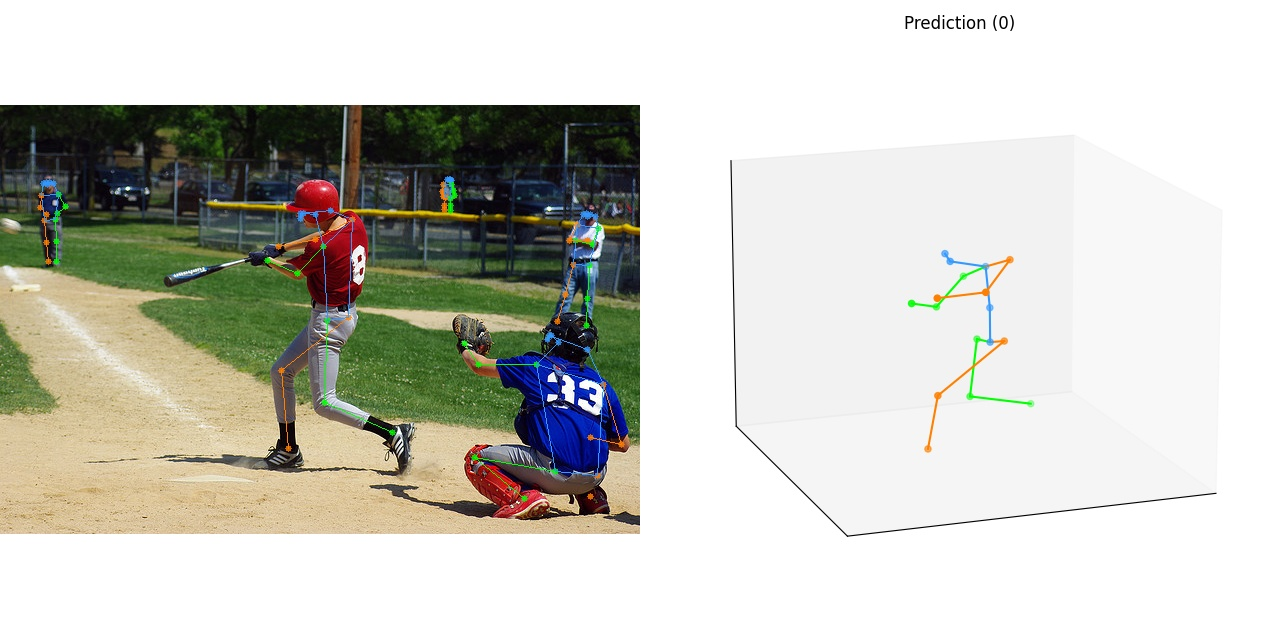

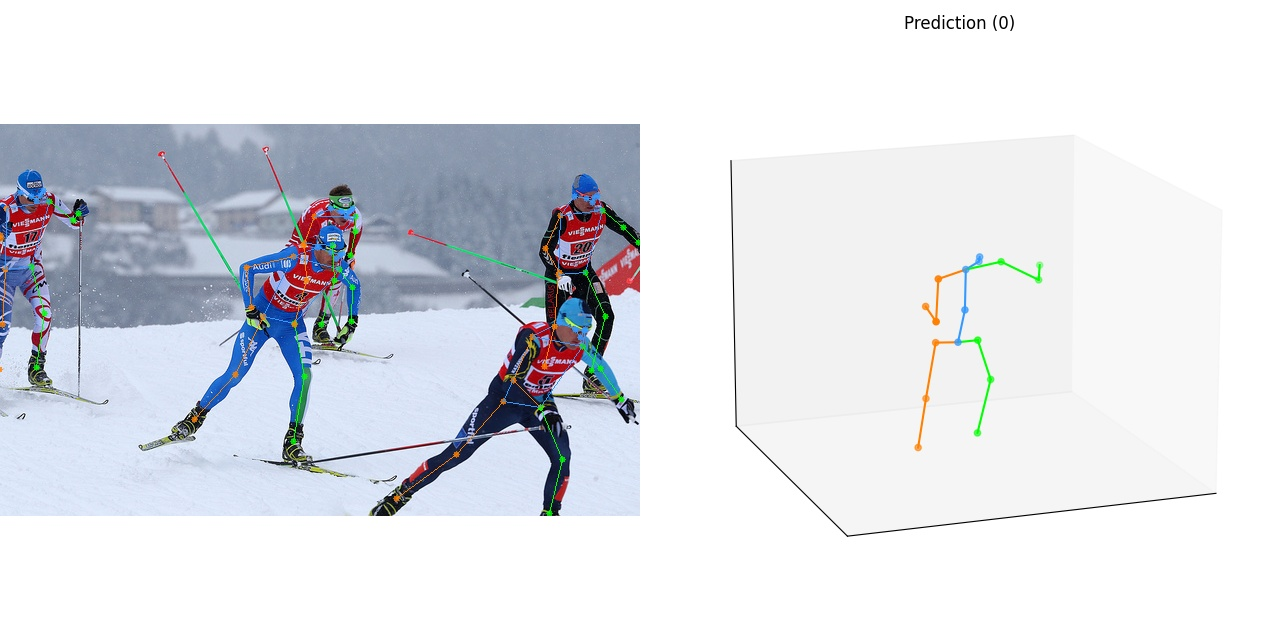

In [35]:
display(Image.open('./vis_results/human3d/000000000785.jpg'))
display(Image.open('./vis_results/human3d/000000040083.jpg'))
display(Image.open('./vis_results/human3d/000000196141.jpg'))
display(Image.open('./vis_results/human3d/000000197388.jpg'))

## 動画の 3D pose detection を試す

*   少し時間がかかる（約1分）

In [36]:
inputs = 'demo/164970135-b14e424c-765a-4180-9bc8-fa8d6abc5510.mp4'
pose3d = 'human3d'
vis_out_dir = 'vis_results'

!python mmpose/demo/inferencer_demo.py {inputs} --pose3d {pose3d} --vis-out-dir {vis_out_dir}

/usr/local/lib/python3.10/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/body_3d_keypoint/pose_lift/h36m/motionbert_ft_h36m-d80af323_20230531.pth
10/15 23:46:14 - mmengine - WARNING - Failed to search registry with scope "mmpose" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmpose" is a correct scope, or whether the registry is initialized.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.p

*   オクルージョンに対応できていないが，概ねうまく検出しているように見える